In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv("/content/sample_data/NetflixOriginals.csv", encoding='latin-1')

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### MissingValues #######################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)


check_df(df)


def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


grab_col_names(df)
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None
##################### Head #####################
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   


                      Language  Runtime
0                 English/Akan  136.000
1         Khmer/English/French  136.000
2                      Marathi  121.667
3               English/Korean  121.000
4              Spanish/Catalan  116.000
5                       Korean  115.833
6                        Hindi  115.788
7               English/Arabic  114.000
8                   Indonesian  103.778
9                      Turkish  101.800
10                       Malay  101.000
11                       Tamil  101.000
12                        Thai  101.000
13                       Dutch   99.667
14                      German   99.600
15                    Filipino   99.500
16                    Japanese   99.333
17                      Polish   98.667
18                     Italian   98.357
19             Spanish/English   96.000
20                     Spanish   93.387
21                      French   92.700
22                     English   91.818
23                  Portuguese   91.250


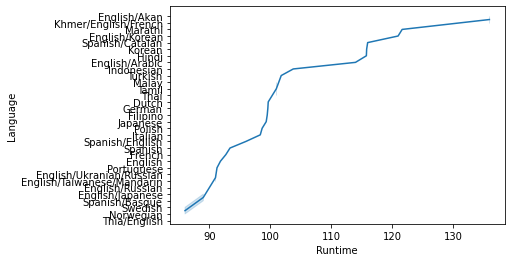

In [ ]:
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)[0:1]
langbyruntime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
print(langbyruntime)

sns.lineplot(y=langbyruntime["Language"], x=langbyruntime.loc[(langbyruntime["Runtime"] >= 86)]["Runtime"])
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df.Premiere)

df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()

docum = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()
docum["Title"].value_counts()


print(df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head())

fig = px.bar(data_frame=docum, x=docum.Title, y=docum["IMDB Score"], labels={"y":"IMDB Score", "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

                                 Title        Genre            Premiere  \
0                      Enter the Anime  Documentary      August 5, 2019   
15                      After the Raid  Documentary   December 19, 2019   
20   Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019   
30                         After Maria  Documentary        May 24, 2019   
111               Ghosts of Sugar Land  Documentary    October 16. 2019   

     Runtime  IMDB Score          Language       Date  
0         58       2.500  English/Japanese 2019-08-05  
15        25       4.300           Spanish 2019-12-19  
20        64       4.400           English 2019-09-13  
30        37       4.600   English/Spanish 2019-05-24  
111       21       5.500           English 2019-10-16  


In [ ]:
df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English,2020-10-04


In [ ]:
df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime   115.788
dtype: float64

In [ ]:
df["Genre"].unique()
df["Genre"].value_counts()
print(df["Genre"].value_counts())
topgenre = df["Genre"].value_counts().nlargest(30)

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama                    

In [ ]:
fig = px.bar(data_frame=topgenre, x=topgenre.index, y=topgenre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

In [ ]:
df["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [ ]:
df.sort_values(by="IMDB Score", ascending=False)[0:10]

top_10_ratings = df.sort_values(by="IMDB Score", ascending=False)[0:10]
fig = px.scatter(top_10_ratings, y= 'Title', x='IMDB Score', color='Genre', 
                 title = "Top 10 High Rated Programs")

fig.show()

            IMDB Score  Runtime
IMDB Score       1.000   -0.041
Runtime         -0.041    1.000


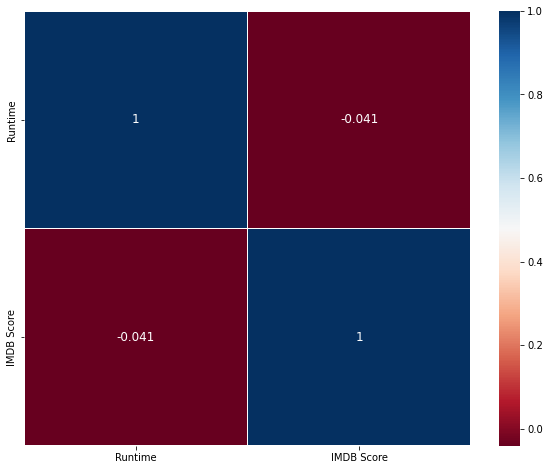

There is no high correlation between Runtime and IMDB Scores


In [ ]:
def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)

print(df[["IMDB Score", "Runtime"]].corr())
correlation_matrix(df, num_cols)
print("There is no high correlation between Runtime and IMDB Scores")

                                      IMDB Score
Genre                                           
Documentary                                9.000
One-man show                               8.500
Concert Film                               8.400
Animation/Christmas/Comedy/Adventure       8.200
Drama                                      7.900
Animation / Short                          7.800
Crime drama                                7.800
Musical / Short                            7.700
Making-of                                  7.700
War drama                                  7.700


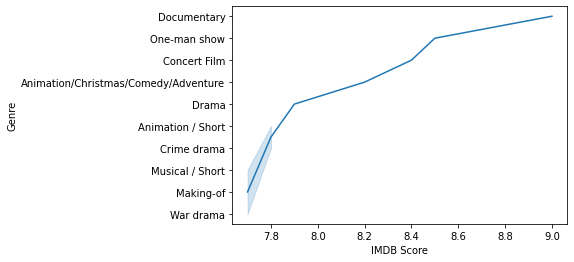

In [ ]:
df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genrescore_on = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[
                0:10].reset_index()

print (df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10])
sns.lineplot(y=genrescore_on["Genre"], x=genrescore_on["IMDB Score"])
plt.show()

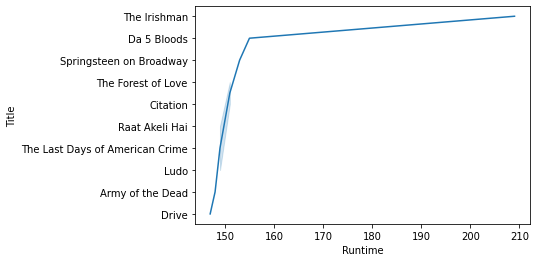

In [ ]:
df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]

Runtime_on = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=Runtime_on["Title"], x=Runtime_on["Runtime"])
plt.show()


In [ ]:
df['Year'] = df['Date'].dt.year
df['Year'].value_counts(sort=True)[0:1]
year = df['Year'].value_counts(sort=True)


fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

In [ ]:
df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[0:1]

df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)
lowest = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)

fig = px.bar(data_frame=lowest, x=lowest.index, y=lowest.values, 
             labels={'y':'Average Rating Score', 'x':'Language'})

fig.show()

In [ ]:
df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]

,Runtime
Year,
2020,17384


In [ ]:
df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))

print("conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.")

Runtime False
IMDB Score False
Date False
Year False
conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.


2.çözüm yolu

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.500,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.600,Spanish,2020-08-21,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.600,Italian,2019-12-26,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.200,English,2018-01-19,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.400,Hindi,2020-10-30,2020


In [ ]:
df.shape

(584, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
 7   Year        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.6+ KB


In [ ]:
df.Genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama                    

In [ ]:
df.describe()

,Runtime,IMDB Score,Year
count,584.000,584.000,584.000
mean,93.577,6.272,2018.937
std,27.762,0.979,1.474
min,4.000,2.500,2014.000
25%,86.000,5.700,2018.000
50%,97.000,6.350,2019.000
75%,108.000,7.000,2020.000
max,209.000,9.000,2021.000


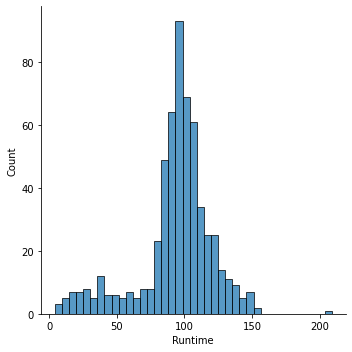

In [ ]:
sns.displot(df['Runtime']);

In [ ]:
Soru-1 Uzun soluklu filmler

In [ ]:
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)

,Runtime
Language,
English/Akan,136.000
Khmer/English/French,136.000
Marathi,121.667
English/Korean,121.000
Spanish/Catalan,116.000
Korean,115.833
Hindi,115.788
English/Arabic,114.000
Indonesian,103.778


In [ ]:
runtimeSort = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
fig = px.bar(data_frame=runtimeSort, x=runtimeSort.Language, y=runtimeSort.Runtime)
fig.show()

Soru-2 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri

In [ ]:
df["Date"] = pd.to_datetime(df.Premiere)

DateSort = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")]
DateSortFig = px.bar(DateSort, x=DateSort.Title, y = DateSort["IMDB Score"])
DateSortFig.show()

Soru 3- İngilizce filmlerde en yüksek IMDB puanı

In [ ]:
a = df.loc[(df["Language"] == "English")]
b = a.sort_values("IMDB Score",ascending=True)
c = b[b["IMDB Score"]>7.5]

fig = px.bar(c, x=c["IMDB Score"],y=c.Title, color = c.Genre)
fig

Soru-4 Hindi dilinde çekilmiş filmlerin ortalama runtime süresi

In [ ]:
Hindi = df.loc[(df["Language"] == "Hindi")]
b = Hindi.Runtime
b.mean()

115.78787878787878

Soru-5'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir?

In [ ]:
df.Genre.nunique()

115

In [ ]:
df.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [ ]:
Genresur = df.Genre.unique()
len(Genresur)

115

In [ ]:
genre = df.Genre.value_counts().nlargest(20) 
genre

Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Name: Genre, dtype: int64

In [ ]:
genre.index

Index(['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller',
       'Comedy-drama', 'Crime drama', 'Biopic', 'Horror', 'Action', 'Romance',
       'Concert Film', 'Aftershow / Interview', 'Animation', 'Action comedy',
       'Romantic drama', 'Psychological thriller', 'Science fiction/Thriller',
       'Variety show', 'Science fiction'],
      dtype='object')

In [ ]:
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Genre Movies", "index":"Genres"})

fig.show()

Soru-6 En çok kulllanılan 3 dil

In [ ]:
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [ ]:
df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [ ]:
lang_3 = df.Language.value_counts().nlargest(3)
lang_3

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [ ]:
fig = px.bar(lang_3, x=lang_3.index, y=lang_3.values, labels={"y":"Count", "index":"Language"})
fig.show()

Soru-7 IMDB puanı en yüksek olan ilk 10 film

In [ ]:
ımdb10 = df.sort_values("IMDB Score",ascending=False)
ımdb10 = ımdb10[0:10]
ımdb10

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English,2020-10-04,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.600,Portuguese,2020-12-08,2020
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.500,English,2018-12-16,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.400,English/Ukranian/Russian,2015-10-09,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.400,English,2018-12-31,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.400,English,2020-05-20,2020
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.300,English,2019-10-23,2019
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.300,English,2017-11-24,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.200,English,2019-11-15,2019
571,13th,Documentary,"October 7, 2016",100,8.200,English,2016-10-07,2016


In [ ]:
fig = px.bar(ımdb10, x=ımdb10["IMDB Score"],y=ımdb10.Title, color = ımdb10.Genre)
fig.show()

Soru-8 IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? 

In [ ]:
df["Runtime"].corr(df["IMDB Score"])

-0.04089629142078858

In [ ]:
df[["IMDB Score", "Runtime"]].corr()

,IMDB Score,Runtime
IMDB Score,1.000,-0.041
Runtime,-0.041,1.000


In [ ]:
df[["Runtime", "IMDB Score"]].corr()

,Runtime,IMDB Score
Runtime,1.000,-0.041
IMDB Score,-0.041,1.000


In [ ]:
fig = px.scatter(data_frame=df, x="IMDB Score", y="Runtime")
fig.update_layout(autosize=False, width=800, height=600,)

fig.show()

Anlamlı bir ilişki bulamadık.

Soru-9 IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir?

In [ ]:
df.groupby("Genre")["IMDB Score"].nlargest(10)

Genre                                    
Action                                372   6.700
                                      277   6.300
                                      220   6.100
                                      153   5.700
                                      50    4.900
                                      39    4.700
                                      5     3.500
Action comedy                         257   6.200
                                      205   5.900
                                      155   5.700
                                      61    5.100
                                      13    4.200
Action thriller                       318   6.400
Action-adventure                      507   7.300
Action-thriller                       450   7.000
                                      315   6.400
                                      55    5.000
Action/Comedy                         99    5.400
Action/Science fiction                104   5.400
Adventur

In [ ]:
top_10_genre =df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=False)[:10]
top_10_genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.600,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.500,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.400,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.400,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.400,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.300,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.300,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.200,English
571,13th,Documentary,"October 7, 2016",100,8.200,English


In [ ]:
fig = px.scatter(top_10_genre, y= 'Genre', x='IMDB Score', hover_data = top_10_genre[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Genre")

fig.show()

Soru-10 Runtime' değeri en yüksek olan ilk 10 film hangileridir?

In [ ]:
top_10_ratings = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["Runtime"], ascending=False)[:10]
top_10_ratings

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.800,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.500,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.500,English
247,Citation,Drama,"November 6, 2020",151,6.200,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.300,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.300,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.700,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.600,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.900,English
5,Drive,Action,"November 1, 2019",147,3.500,Hindi


In [ ]:
fig = px.scatter(top_10_ratings, y= 'Title', x='Runtime', hover_data = top_10_ratings[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Programs")

fig.show()

Soru-11 Hangi yılda en fazla film yayımlanmıştır?

In [ ]:
df['Year'] = df['Date'].dt.year
year = df.Year.value_counts()

year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

In [ ]:
year.index

Int64Index([2020, 2019, 2018, 2021, 2017, 2016, 2015, 2014], dtype='int64')

In [ ]:
year.values

array([183, 125,  99,  71,  66,  30,   9,   1])

In [ ]:
fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

Soru-12 Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir?

In [ ]:
low_10_mov = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=True)[:10]
low_10_mov

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.500,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.600,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.600,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.200,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.400,Hindi
5,Drive,Action,"November 1, 2019",147,3.500,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.700,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.700,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.900,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.100,Hindi


In [ ]:
low_10_mov = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)
low_10_mov

Language
Malay              4.200
English/Japanese   4.400
Filipino           5.100
Norwegian          5.100
Polish             5.167
Thai               5.450
Swedish            5.500
Italian            5.543
Spanish/Basque     5.600
German             5.640
Turkish            5.660
French             5.770
Dutch              5.800
Indonesian         5.844
Korean             5.917
Name: IMDB Score, dtype: float64

In [ ]:
low_10_mov = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)
low_10_mov

Language
Malay              4.200
English/Japanese   4.400
Filipino           5.100
Norwegian          5.100
Polish             5.167
Thai               5.450
Swedish            5.500
Italian            5.543
Spanish/Basque     5.600
German             5.640
Turkish            5.660
French             5.770
Dutch              5.800
Indonesian         5.844
Korean             5.917
Name: IMDB Score, dtype: float64

Soru-13 Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
df[df.Runtime == df.Runtime.max()]["Premiere"]

561    November 27, 2019
Name: Premiere, dtype: object

In [ ]:
year = df.Year.value_counts()
RunYear = df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
fig = px.bar(data_frame=RunYear, x=RunYear.index, y=RunYear.Runtime)
fig.show()

Soru-14 Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
dLanguage = df.groupby(["Language"])["Genre"].value_counts().groupby(level=0, group_keys=False).head(1)
dLanguage

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

Analiz sonucunda herhangi bir outlier bulamadık.